# Minicomp - Rossman

- Use pyCaret as ML framework for model building

## Import libraries

In [1]:
import numpy as np
import pandas as pd

import missingno as msno



## Import functions

In [2]:
def df_dropduplicated(df):
    df = df.drop_duplicates()
    return df


def fill_missing_values(df, colnames):
    val = df[colnames].median()
    df[colnames] = df[colnames].fillna(val)
    return df
    
def remove_outliers(df, colnames):
    for col in colnames:
        avg = df[col].mean()
        std = df[col].std()
        low = avg - 3 * std
        high = avg + 3 * std
        df = df[df[col].between(low, high, inclusive=True)]
    return df


## Import Data

In [3]:
train = pd.read_csv('./data/train.csv')
store = pd.read_csv('./data/store.csv')

C:\Users\paulg\.conda\envs\minicomp\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Process data

- Inspect Data
- Clean data 


In [4]:
#Inspect train Data 

print(train.shape)
train.info()


(637774, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637774 entries, 0 to 637773
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           637774 non-null  object 
 1   Store          618473 non-null  float64
 2   DayOfWeek      618757 non-null  float64
 3   Sales          618747 non-null  float64
 4   Customers      618683 non-null  float64
 5   Open           618588 non-null  float64
 6   Promo          618580 non-null  float64
 7   StateHoliday   618520 non-null  object 
 8   SchoolHoliday  618437 non-null  float64
dtypes: float64(7), object(2)
memory usage: 43.8+ MB


In [5]:
#Inspect store data
print(store.shape)
store.info()

(1115, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [6]:
# Join data

combined = pd.merge(train, store,
                   on='Store', how = 'left')

combined.shape

(637774, 18)

In [7]:
combined = combined.drop(columns=['Customers'])

In [8]:
combined['Date'] = pd.to_datetime(combined['Date'])
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637774 entries, 0 to 637773
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Date                       637774 non-null  datetime64[ns]
 1   Store                      618473 non-null  float64       
 2   DayOfWeek                  618757 non-null  float64       
 3   Sales                      618747 non-null  float64       
 4   Open                       618588 non-null  float64       
 5   Promo                      618580 non-null  float64       
 6   StateHoliday               618520 non-null  object        
 7   SchoolHoliday              618437 non-null  float64       
 8   StoreType                  618473 non-null  object        
 9   Assortment                 618473 non-null  object        
 10  CompetitionDistance        616838 non-null  float64       
 11  CompetitionOpenSinceMonth  422043 non-null  float64 

In [9]:
combined['Year'] = pd.DatetimeIndex(combined['Date']).year
combined['Month'] = pd.DatetimeIndex(combined['Date']).month
combined.head()

,Date,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
0,2013-01-01,1115.0,2.0,0.0,0.0,0.0,a,1.0,d,c,5350.0,NaN,NaN,1.0,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1
1,2013-01-01,379.0,2.0,0.0,0.0,0.0,a,1.0,d,a,6630.0,NaN,NaN,0.0,NaN,NaN,NaN,2013,1
2,2013-01-01,378.0,2.0,0.0,0.0,0.0,a,1.0,a,c,2140.0,8.0,2012.0,0.0,NaN,NaN,NaN,2013,1
3,2013-01-01,377.0,2.0,0.0,0.0,0.0,a,1.0,a,c,100.0,6.0,2010.0,1.0,18.0,2010.0,"Feb,May,Aug,Nov",2013,1
4,2013-01-01,376.0,2.0,0.0,0.0,0.0,a,1.0,a,a,160.0,8.0,2012.0,0.0,NaN,NaN,NaN,2013,1


In [10]:
#extract object colnames
col_object = list(combined.select_dtypes(include = 'object').columns)
col_object

['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']

In [11]:
#extract numeric colnames
col_num = list(combined.select_dtypes(include = ['int','float']).columns)
col_num

['Store',
 'DayOfWeek',
 'Sales',
 'Open',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear']

<AxesSubplot:>

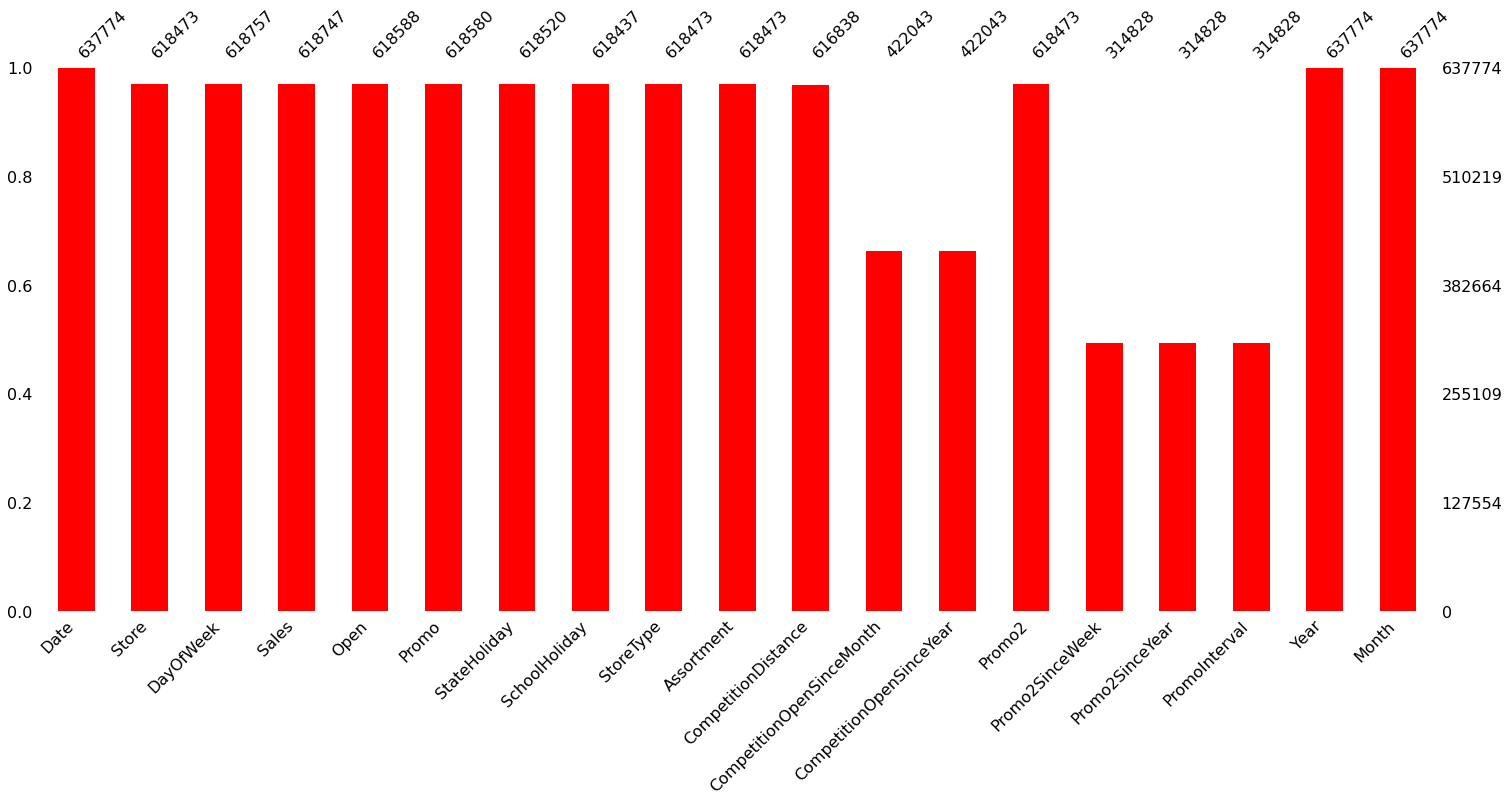

In [12]:
msno.bar(combined, color='red')

In [13]:
#Cleaning State Holidays
train.value_counts('StateHoliday')

StateHoliday
0      535644
0.0     63583
a       12798
b        4335
c        2160
dtype: int64

In [14]:
df1 = combined.copy()
df1['StateHoliday'] = df1['StateHoliday'].replace(0.0,'0')

In [15]:
df1.value_counts('StateHoliday')

StateHoliday
0    599227
a     12798
b      4335
c      2160
dtype: int64

In [16]:
df1 = combined.drop(columns=['Date'])

In [17]:
#def fill_missing_values(df, colnames):
#    val = df[colnames].median()
#    df[colnames] = df[colnames].fillna(val)
#    return df

In [18]:
#Fill miss vals

cols = ['Store','DayOfWeek','Sales','Open','Promo','SchoolHoliday','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']

#df2 = fill_missing_values(df1, cols)
        
#drop duplicates
df3 = df_dropduplicated(df1)

#remove outliers
#df4 = remove_outliers(df3, col_numerics)

#dropna of StateHolidays
df5 = df3.dropna(subset=['StateHoliday','StoreType','Assortment'])

       

<AxesSubplot:>

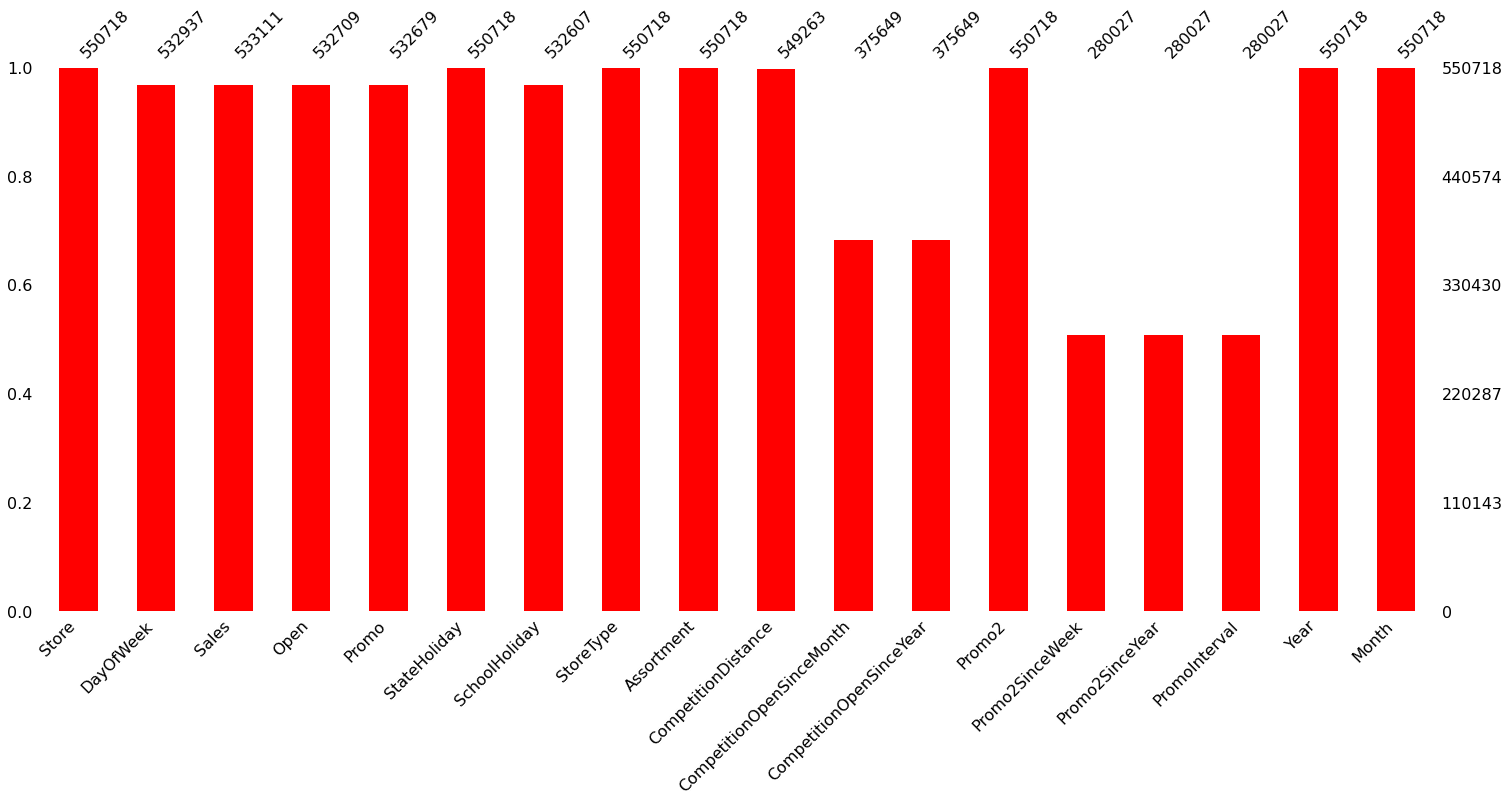

In [19]:
msno.bar(df5, color='red')

In [20]:
df6 = df3.drop(columns = ['Promo2SinceWeek','Promo2SinceYear','PromoInterval'])
df6 = df6.loc[df6['Sales'] > 0,:]
combined_nopromo = df6.copy()

df7 = df1[df1['Promo2'] == 1]
combined_promo = df7.copy()

In [21]:
combined_nopromo.loc[combined_nopromo['Sales'] ==0]

,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Year,Month


In [22]:
combined_nopromo.shape

(512793, 15)

In [23]:
combined_promo.shape

(314828, 18)

In [24]:
combined_nopromo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512793 entries, 27 to 637773
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      497272 non-null  float64
 1   DayOfWeek                  497494 non-null  float64
 2   Sales                      512793 non-null  float64
 3   Open                       497338 non-null  float64
 4   Promo                      497354 non-null  float64
 5   StateHoliday               497233 non-null  object 
 6   SchoolHoliday              497246 non-null  float64
 7   StoreType                  497272 non-null  object 
 8   Assortment                 497272 non-null  object 
 9   CompetitionDistance        495967 non-null  float64
 10  CompetitionOpenSinceMonth  339234 non-null  float64
 11  CompetitionOpenSinceYear   339234 non-null  float64
 12  Promo2                     497272 non-null  float64
 13  Year                       5

## Model Building

Use of pyCaret framework for model building

In [25]:
from pycaret.regression import *

In [26]:
#take sample 
import random
random.seed(170587)

df_sample = combined_nopromo.sample(20000)
df_sample.shape

(20000, 15)

**Pre-processing of data**

- Imputation
- Encoding
- Center/Scaling
- Remove low variance / multicolinearity
- feature selection

In [27]:
#Pre-Process data

reg1 = setup(data = combined_nopromo,
             session_id=42,
             train_size = 0.70,
             target = 'Sales',
             high_cardinality_features = ['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday','SchoolHoliday', 'StoreType', 'Assortment','CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2','Year', 'Month'],
             numeric_imputation = 'median',
             categorical_imputation = 'mode',
             #feature_selection = True,
             normalize = True, 
             transformation = True, 
             transform_target = False,
             ignore_low_variance = True,
             remove_multicollinearity = True, 
             multicollinearity_threshold = 0.80, 
             polynomial_features = True,
             trigonometry_features = False,
             polynomial_degree = 2,
             polynomial_threshold = 0.9,
             numeric_features = ['CompetitionDistance'],
             categorical_features = ['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday','SchoolHoliday', 'StoreType', 'Assortment','CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2','Year', 'Month'],
             log_experiment = True, 
             verbose = True,
             experiment_name = 'regression1'
             )

,Description,Value
0,session_id,42
1,Target,Sales
2,Original Data,"(512793, 15)"
3,Missing Values,True
4,Numeric Features,1
5,Categorical Features,13
6,Ordinal Features,False
7,High Cardinality Features,True
8,High Cardinality Method,frequency
9,Transformed Train Set,"(358955, 13)"


In [28]:
get_config('X_train')

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,CompetitionDistance,CompetitionOpenSinceMonth,Year,Assortment_Power2,Promo2_Power2,CompetitionOpenSinceYear_Power2,Month_Power2
140807,-0.496659,-0.071967,0.850831,0.340783,0.47025,-0.894500,-0.777077,1.107025,0.751375,-1.043607,0.956689,1.198261,0.296783
19415,0.278898,-0.382070,0.850831,0.340783,0.47025,-1.468364,-0.170217,-1.222379,0.751375,0.904394,-1.045272,-0.775718,1.433077
263025,0.410551,1.749081,0.850831,0.340783,0.47025,-0.894500,2.052358,-0.727387,0.751375,0.904394,-1.045272,1.198261,-1.484050
546435,-0.314477,-0.071967,-1.175321,0.340783,0.47025,-0.894500,0.929847,1.107025,-1.330893,-1.043607,-1.045272,-0.835654,0.296783
459476,0.032774,-0.542550,-1.175321,-2.934419,0.47025,-1.468364,-1.241169,-0.740259,-1.330893,-1.043607,-1.045272,-0.847439,0.031365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
321375,-0.284676,-0.294642,0.850831,0.340783,0.47025,-1.468364,0.587967,-1.064166,0.751375,-1.043607,-1.045272,-0.835654,-1.498793
454417,1.701882,-0.294642,0.850831,0.340783,0.47025,-1.744816,-0.595630,1.107025,-1.330893,-2.701697,-1.045272,1.198261,0.031365
166380,0.004688,-0.681537,-1.175321,0.340783,0.47025,0.880689,-0.227483,1.107025,0.751375,-1.043607,0.956689,-0.835654,0.296783
184556,0.088502,1.749081,0.850831,0.340783,0.47025,0.880689,-1.268871,-0.740259,0.751375,0.904394,-1.045272,-0.775718,0.139615


**Extract processed data**

In [29]:
combined_nopromo_processed_x_train = get_config('X_train')
combined_nopromo_processed_y_train = get_config('y_train')
combined_nopromo_processed_x_test = get_config('X_test')
combined_nopromo_processed_y_test = get_config('y_test')

**Get process pipeline**

In [193]:
get_config('prep_pipe')

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['Store',
                                                            'DayOfWeek', 'Open',
                                                            'Promo',
                                                            'StateHoliday',
                                                            'SchoolHoliday',
                                                            'StoreType',
                                                            'Assortment',
                                                            'CompetitionOpenSinceMonth',
                                                            'CompetitionOpenSinceYear',
                                                            'Promo2', 'Year',
                                                            'Month'],
                                      display_types=True, features_todrop=[],
                             

**Screening of Model architecture**

Screening of different model architectures with default values

In [ ]:
# Screen for algorithm
best = compare_models(fold = 10)

IntProgress(value=0, description='Processing: ', max=89)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:20:32
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,1015.4812,2479806.0755,1574.6400,0.7404,0.2113,0.1541,0.6460
knn,K Neighbors Regressor,1316.9795,3750594.5500,1936.5752,0.6074,0.2649,0.2082,13.7760
lr,Linear Regression,2041.8485,7831297.3000,2798.4021,0.1803,0.3912,0.3486,0.4550
lasso,Lasso Regression,2041.6540,7831318.2500,2798.4058,0.1803,0.3911,0.3486,0.2700
ridge,Ridge Regression,2041.8483,7831297.4000,2798.4021,0.1803,0.3912,0.3486,0.0520
lar,Least Angle Regression,2041.8485,7831297.3665,2798.4021,0.1803,0.3912,0.3486,0.0530
br,Bayesian Ridge,2041.8387,7831297.2475,2798.4020,0.1803,0.3912,0.3486,0.2530
huber,Huber Regressor,1994.9704,8049352.1863,2837.0913,0.1575,0.3838,0.3214,0.8900
en,Elastic Net,2062.3340,8050655.8500,2837.3245,0.1573,0.3979,0.3576,0.0960
par,Passive Aggressive Regressor,1995.9607,8177055.5782,2859.4881,0.1441,0.3843,0.3156,0.2390


**Create Model**

Create best model architecture from short list. Here use random forest

In [196]:
# train rf model using 10 fold CV
rf = create_model('rf', fold = 10, n_estimators = 500)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1248.5864,3106431.7606,1762.5072,0.6278,0.2642,0.2164
1,1308.7958,3636282.9742,1906.9040,0.6321,0.2576,0.2103
2,1334.9307,3897248.0057,1974.1449,0.6210,0.2612,0.2102
3,1239.0909,3117814.6373,1765.7335,0.6517,0.2447,0.1965
4,1293.3871,3625354.4164,1904.0363,0.6264,0.2618,0.2142
5,1254.9003,3131093.4295,1769.4896,0.6523,0.2568,0.2125
6,1249.3099,3199708.1135,1788.7728,0.6479,0.2543,0.2028
7,1297.6234,3599580.6544,1897.2561,0.6143,0.2529,0.2015
8,1263.5486,3248802.7978,1802.4436,0.6406,0.2673,0.2157
9,1199.2759,3045749.0606,1745.2075,0.6453,0.2502,0.1982


In [183]:
print(rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)


In [195]:
# train et model using 10 fold CV
et = create_model('et', fold = 10, n_estimators = 500)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1248.7538,3257343.3185,1804.8112,0.6097,0.2625,0.2106
1,1341.0079,3708460.5175,1925.7364,0.6248,0.2687,0.2193
2,1320.5016,3720597.2287,1928.8850,0.6382,0.2549,0.2043
3,1260.3588,3224485.2131,1795.6852,0.6398,0.2480,0.1987
4,1307.1974,3537252.6432,1880.7585,0.6354,0.2647,0.2161
5,1296.6086,3387281.1815,1840.4568,0.6239,0.2650,0.2172
6,1252.0200,3188175.8051,1785.5464,0.6491,0.2583,0.2017
7,1266.9784,3251409.2143,1803.1664,0.6516,0.2516,0.1991
8,1234.2174,3034096.8216,1741.8659,0.6643,0.2574,0.2056
9,1245.6532,3110995.7736,1763.8015,0.6377,0.2615,0.2051


In [199]:
print(et)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=500, n_jobs=-1, oob_score=False,
                    random_state=42, verbose=0, warm_start=False)


**Model Tuning**

Use custom grid in 5-fold cross-validation with 10 interation 

In [200]:
#from scipy.stats import randint

#params = {'n_estimators': np.random.randint(50, 500, 10),
#          'max_depth': np.random.randint(5, 10, 1),
#          'min_samples_leaf': [2,3,4,5,6]}

#tune rf model 
tune_rf = tune_model(rf, fold = 5, n_iter = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1684.8649,5233528.5429,2287.6907,0.4267,0.3366,0.2946
1,1699.9621,5569296.4709,2359.9357,0.4210,0.3303,0.2836
2,1697.2352,5434919.7330,2331.2914,0.4192,0.3425,0.3031
3,1713.5812,5368764.9947,2317.0596,0.4171,0.3309,0.2858
4,1678.9161,4954360.1481,2225.8392,0.4379,0.3393,0.3014
Mean,1694.9119,5312173.9779,2304.3633,0.4244,0.3359,0.2937
SD,12.1347,209091.7890,45.6478,0.0075,0.0047,0.0079


In [201]:
#tune rf model 
tune_et = tune_model(et, fold = 5, n_iter = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1820.0627,6114151.3795,2472.6810,0.3302,0.3571,0.3173
1,1850.2304,6732359.9976,2594.6792,0.3001,0.3557,0.3068
2,1841.4846,6572034.1863,2563.5979,0.2976,0.3669,0.3269
3,1826.7490,6263305.7222,2502.6597,0.3200,0.3489,0.3021
4,1783.3181,5745639.2111,2397.0063,0.3481,0.3581,0.3202
Mean,1824.3690,6285498.0993,2506.1248,0.3192,0.3573,0.3147
SD,23.1134,347300.5340,69.5448,0.0189,0.0058,0.0090


## Model Diagnostic

Inspect Model properties

**Random Forest**

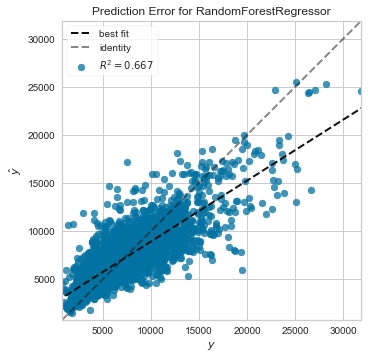

In [202]:
plot_model(rf, 'error')

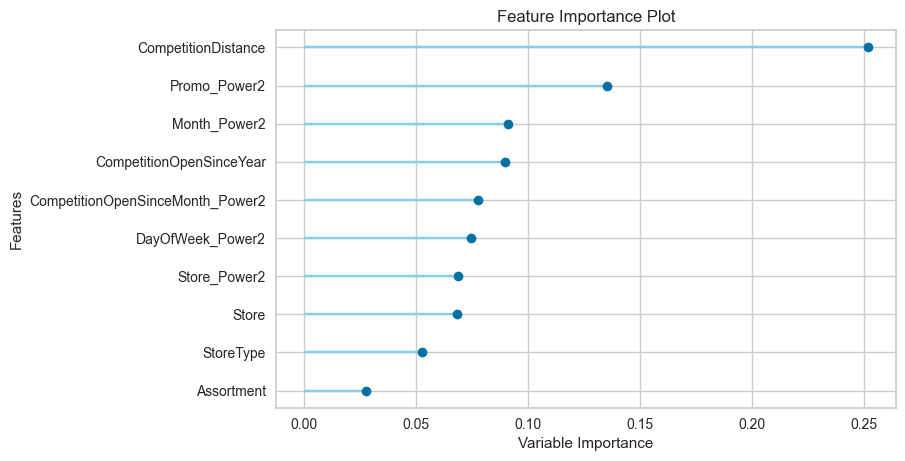

In [204]:
plot_model(rf, 'feature')

In [205]:
plot_model(rf, 'parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
criterion,mse
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1


In [206]:
predict_model(rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1256.5271,3270220.6602,1808.3751,0.6666,0.2592,0.2105


,Store,StateHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceYear,Year,Month_Power2,Promo_Power2,CompetitionOpenSinceMonth_Power2,Store_Power2,SchoolHoliday_Power2,DayOfWeek_Power2,Promo2_Power2,Sales,Label
0,-0.049526,0.335064,0.879814,0.898922,-1.249877,1.173553,0.749577,0.413127,-1.172486,1.100126,-0.205247,0.482544,1.688426,0.958637,7152.0,7227.320000
1,-0.049526,0.335064,-0.899981,-1.035681,-1.185693,1.173553,-1.334086,0.793587,0.852888,1.100126,-0.205247,-2.072349,-0.036903,0.958637,3939.0,4370.996000
2,0.181068,0.335064,0.879814,-1.035681,-0.296871,1.173553,0.749577,-1.448665,-1.172486,1.100126,-0.142262,-2.072349,-0.813637,-1.043147,6140.0,8156.046000
3,-1.460329,0.335064,0.879814,0.898922,-1.101855,-0.615962,-1.334086,0.385695,-1.172486,1.100126,-0.456596,0.482544,-0.423557,-1.043147,3602.0,6685.018667
4,0.181068,0.335064,0.879814,0.898922,1.894492,-0.952862,0.749577,-0.163004,-1.172486,-0.859504,-0.142262,0.482544,1.688426,-1.043147,5531.0,4846.540100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5996,0.181068,0.335064,0.879814,0.898922,0.629111,-0.615962,-1.334086,0.793587,0.852888,1.100126,-0.142262,-2.072349,-0.813637,0.958637,4192.0,4805.780000
5997,-0.296069,0.335064,0.879814,0.898922,-0.881380,-0.615962,-1.334086,0.793587,0.852888,-0.877631,-0.264163,-2.072349,1.688426,0.958637,6213.0,5800.783000
5998,0.597811,0.335064,-1.459742,-1.035681,0.295047,-0.817122,0.749577,1.544111,0.852888,-0.908730,-0.004641,0.482544,-0.813637,-1.043147,3755.0,5170.776167
5999,-1.800918,0.335064,-0.899981,-1.035681,-0.082091,1.173553,0.749577,-0.163004,-1.172486,1.100126,-0.493348,0.482544,-0.634607,-1.043147,9509.0,8869.950000


**Extra Trees Regressor**

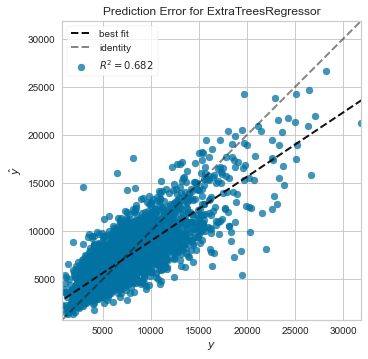

In [208]:
plot_model(et, 'error')

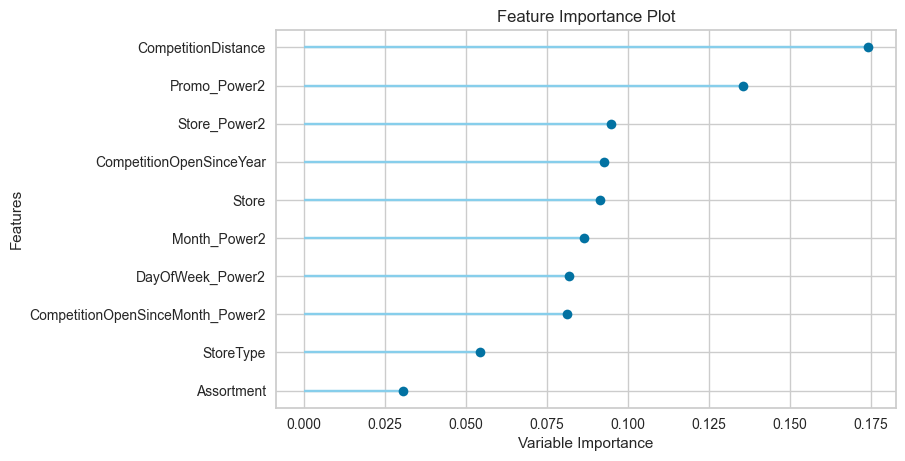

In [209]:
plot_model(et, 'feature')

In [210]:
predict_model(et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1239.6618,3117404.3151,1765.6173,0.6822,0.2556,0.2049


,Store,StateHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceYear,Year,Month_Power2,Promo_Power2,CompetitionOpenSinceMonth_Power2,Store_Power2,SchoolHoliday_Power2,DayOfWeek_Power2,Promo2_Power2,Sales,Label
0,-0.049526,0.335064,0.879814,0.898922,-1.249877,1.173553,0.749577,0.413127,-1.172486,1.100126,-0.205247,0.482544,1.688426,0.958637,7152.0,6851.152
1,-0.049526,0.335064,-0.899981,-1.035681,-1.185693,1.173553,-1.334086,0.793587,0.852888,1.100126,-0.205247,-2.072349,-0.036903,0.958637,3939.0,4857.634
2,0.181068,0.335064,0.879814,-1.035681,-0.296871,1.173553,0.749577,-1.448665,-1.172486,1.100126,-0.142262,-2.072349,-0.813637,-1.043147,6140.0,7617.264
3,-1.460329,0.335064,0.879814,0.898922,-1.101855,-0.615962,-1.334086,0.385695,-1.172486,1.100126,-0.456596,0.482544,-0.423557,-1.043147,3602.0,6165.548
4,0.181068,0.335064,0.879814,0.898922,1.894492,-0.952862,0.749577,-0.163004,-1.172486,-0.859504,-0.142262,0.482544,1.688426,-1.043147,5531.0,4205.416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5996,0.181068,0.335064,0.879814,0.898922,0.629111,-0.615962,-1.334086,0.793587,0.852888,1.100126,-0.142262,-2.072349,-0.813637,0.958637,4192.0,5314.230
5997,-0.296069,0.335064,0.879814,0.898922,-0.881380,-0.615962,-1.334086,0.793587,0.852888,-0.877631,-0.264163,-2.072349,1.688426,0.958637,6213.0,5348.610
5998,0.597811,0.335064,-1.459742,-1.035681,0.295047,-0.817122,0.749577,1.544111,0.852888,-0.908730,-0.004641,0.482544,-0.813637,-1.043147,3755.0,5613.036
5999,-1.800918,0.335064,-0.899981,-1.035681,-0.082091,1.173553,0.749577,-0.163004,-1.172486,1.100126,-0.493348,0.482544,-0.634607,-1.043147,9509.0,10330.688


## Model Deployment

Finalize model and save pipeline 

In [211]:
save_model(rf, '2021-08-12-mini-rf_sample')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['Store',
                                                             'DayOfWeek', 'Open',
                                                             'Promo',
                                                             'StateHoliday',
                                                             'SchoolHoliday',
                                                             'StoreType',
                                                             'Assortment',
                                                             'CompetitionOpenSinceMonth',
                                                             'CompetitionOpenSinceYear',
                                                             'Promo2', 'Year',
                                                             'Month'],
                                       display_types=True, features_todrop=[],
               

In [212]:
save_model(et, '2021-08-12-mini-et_sample')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['Store',
                                                             'DayOfWeek', 'Open',
                                                             'Promo',
                                                             'StateHoliday',
                                                             'SchoolHoliday',
                                                             'StoreType',
                                                             'Assortment',
                                                             'CompetitionOpenSinceMonth',
                                                             'CompetitionOpenSinceYear',
                                                             'Promo2', 'Year',
                                                             'Month'],
                                       display_types=True, features_todrop=[],
               

Load pipeline and Model

In [218]:
y_pred = et.predict(combined_nopromo_processed_x_test)

## Compute Metric

In [216]:
def compute_rmse(actual, prediction):
    """
    Computs RMSE (root mean squared error) between predictions from a model
    and the actual values of the target variable.
    """
    rmse = sqrt(mean_squared_error(actual, prediction))
    # rounding to 2 decimal places
    print('RMSE is ', round(rmse,2))
    return rmse

In [217]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [219]:
random_forest_rmse = compute_rmse(combined_nopromo_processed_y_test, y_pred)

RMSE is  1765.62


In [220]:
random_forest_rmse = compute_rmse(combined_nopromo['Sales'], y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [512793, 6001]

In [63]:
combined_nopromo['Sales'].isna().sum()

19027

In [51]:
def metric(preds, actuals):
    preds = preds.reshape(-1)
    actuals = actuals.reshape(-1)
    assert preds.shape == actuals.shape
    return 100 * np.linalg.norm((actuals - preds) / actuals) / np.sqrt(preds.shape[0])
metric(y_pred,combined_nopromo_processed_y_test.to_numpy())

nan